## Wine Quality Classification
Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests.

Download the datasset from: https://www.kaggle.com/code/anatpeled/multi-class-classification-for-wine-quality


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = 'winequalityN.csv'
wine_data = pd.read_csv(path)


In [3]:

# Display the first few rows
print("First few rows of the dataset:")
wine_data.head()

First few rows of the dataset:


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
wine_data.duplicated().sum()

1168

In [7]:
wine_data['type'].loc[wine_data.duplicated()==1].value_counts()

type
white    928
red      240
Name: count, dtype: int64

### Handle Duplicate Data

In [8]:
# Check for duplicates
duplicates = wine_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
wine_data = wine_data.drop_duplicates()
print("Duplicates removed.")


Number of duplicate rows: 1168
Duplicates removed.


In [9]:
# Check for missing values in the dataset
print(wine_data.isnull().sum())


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [10]:
# Drop rows with any missing values
wine_data = wine_data.dropna()


### Exploratory data analysis


### Type

In [11]:
# View unique types in the dataset
print("Unique wine type:", wine_data['type'].unique())

Unique wine type: ['white' 'red']


This is the only categorical feature in the dataset, except for the target. There are two types of wines - red wine and white wine.


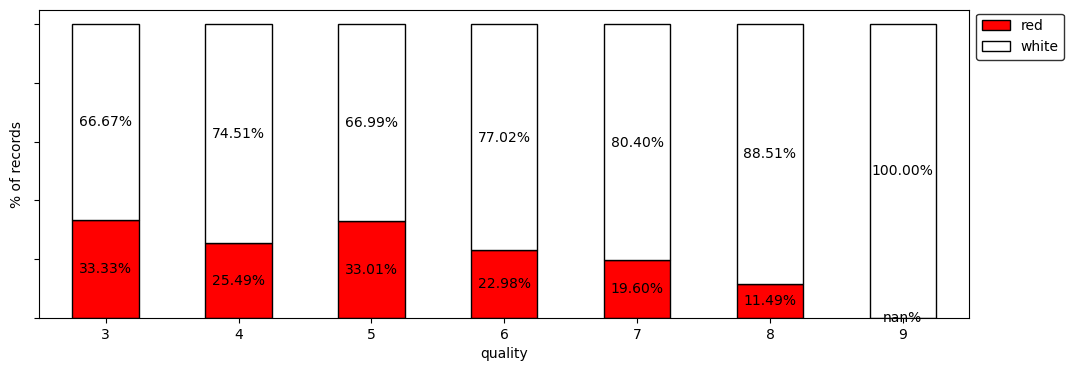

In [12]:
#Setting Up the Plot
fig, ax = plt.subplots(figsize=(12,4))

#Display Options for Data Formatting
pd.options.display.float_format = '{:,.2f}'.format

#Preparing the Data for Plotting
bar_chart = wine_data.groupby(['type','quality'])['quality'].count().unstack('type')

#Normalization: (bar_chart.T / bar_chart.T.sum()).T calculates the percentage of each wine type
#within each quality level by dividing the counts by the total for each row (i.e., quality level).
bar_chart= (bar_chart.T/bar_chart.T.sum()).T

#Plotting the Stacked Bar Chart
ax = bar_chart.plot(kind='bar', stacked=True, color=['r','w'], edgecolor='black', ax=ax)

#Adding Percentage Labels
labels = []
for j in bar_chart.columns:
    for i in bar_chart.index:
          label = str('{0:.2%}'.format(bar_chart.loc[i][j]))
          labels.append(label)

#Positioning the Labels on the Plot
patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='black')

#Customizing the Axis Labels and Legend
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(labels='')
ax.set_ylabel('% of records')
plt.legend(bbox_to_anchor = (1, 1.01), edgecolor='black')
plt.show()

A **pie** chart to show the distribution of red and white wines in the dataset. 

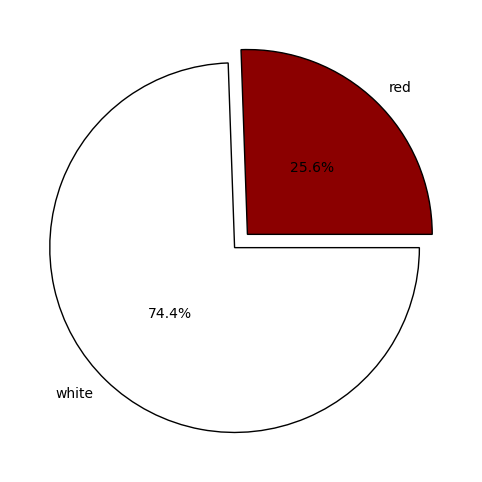

In [13]:
#Grouping and Counting Wine Types
data = wine_data.groupby('type')['quality'].count()

#Setting Up the Plot
fig, ax = plt.subplots(figsize=[10,6])

#Defining Labels
labels = ['red','white']

#Creating the Pie Chart
ax = plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['darkred','white'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)
plt.show()

A **violin plot** to show the distribution of wine quality ratings for both red and white wines.

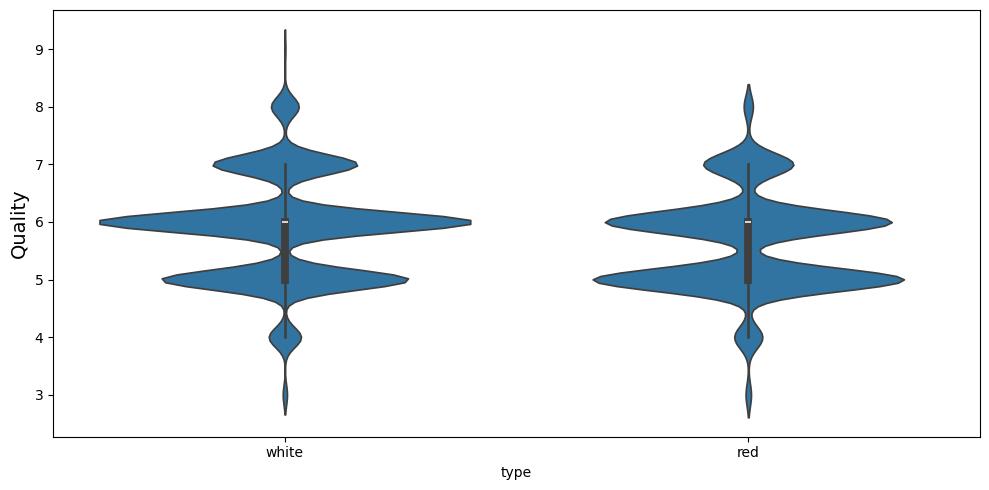

In [14]:
#Setting Up the Figure
fig, ax = plt.subplots(figsize=(10,5))

#Defining Colors
colors = ['w', 'r']

#Setting the Color Palette
sns.set_palette(sns.color_palette(colors))

#Creating the Violin Plot
ax = sns.violinplot(data=wine_data ,x=wine_data.type ,y=wine_data.quality)

#Adding Labels
ax.set_ylabel('Quality', fontsize=14)

#Adjusting the Layout
plt.tight_layout()

The plot shows the distribution of quality ratings for both red and white wines:

- The white violin (for white wine) is on the left, and the red violin (for red wine) is on the right.
- The distribution shape of each wine type shows the concentration of quality ratings. For example:

    If the violin plot for white wine is widest around a quality rating of 5 or 6, it indicates that most white wines have these quality ratings.

    Similarly, red wines are likely concentrated around certain quality levels depending on where the red violin plot is widest.

Understanding the Target (Wine Quality Ratings)

In [15]:
# View unique values in the quality column
print("Unique quality ratings:", wine_data['quality'].unique())


Unique quality ratings: [6 5 7 8 4 3 9]


In [16]:
# Checking the distribution of wine quality ratings 
# to understand the frequency of each wine quality rating and observe if there is an imbalance.

print("Quality distribution:\n", wine_data['quality'].value_counts())

# value_counts() will display the count of each unique value in the quality column, 
# which helps you understand how common each rating is in the dataset.

Quality distribution:
 quality
6    2311
5    1745
7     852
4     204
8     148
3      30
9       5
Name: count, dtype: int64


This output indicates:

Imbalance: Quality ratings of 5 and 6 are most common, while ratings of 3 and 8 are rare.
Implication: If you’re building a classification model, it may **struggle to accurately predict the minority classes** due to this imbalance. This will lead to discussions on resampling methods or class weighting to improve performance on imbalanced classes.

In [17]:
# Print the lowest and highest quality ratings
lowest_quality = wine_data['quality'].min()
highest_quality = wine_data['quality'].max()

print("Lowest wine quality rating:", lowest_quality)
print("Highest wine quality rating:", highest_quality)


Lowest wine quality rating: 3
Highest wine quality rating: 9


### Visualizing the Distribution of the Target 
Let's use a plot to visually assess the distribution of wine quality ratings.

/var/folders/zm/gq3nxpg11z965yv5wkmblw5h0000gn/T/ipykernel_14093/600811888.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine_data, x='quality', palette='viridis')


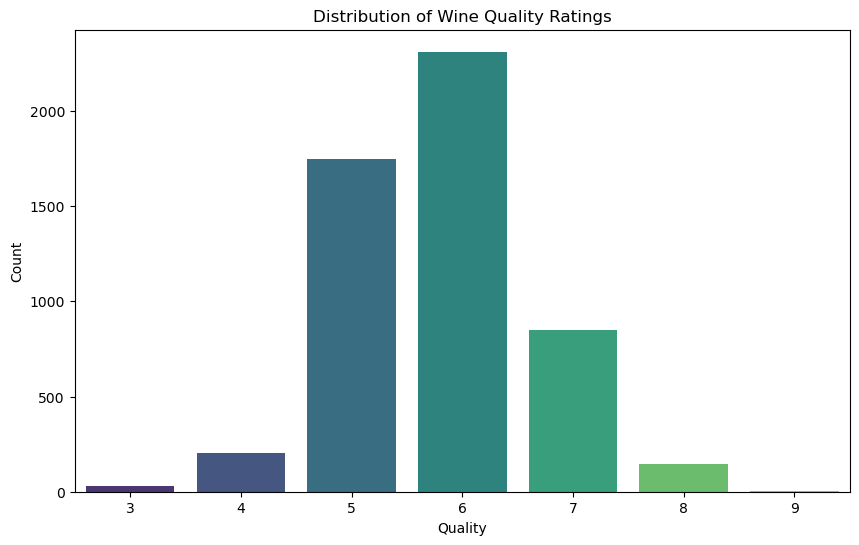

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of quality ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=wine_data, x='quality', palette='viridis')
plt.title("Distribution of Wine Quality Ratings")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

# A count plot makes it easy to see if certain ratings are more common than others. 
# This visualization is particularly helpful for identifying any imbalances in the quality ratings, 
# which is useful for discussions on class imbalance in machine learning.

### Feature Exploration 

### Visualize Alcohol vs. Quality
What is the relationship between individual alcohol values and quality ratings?


In [19]:
# Calculate Correlation: Quantify the Relationship Between Alcohol and Quality
# Calculate the correlation between alcohol content and quality
correlation = wine_data['alcohol'].corr(wine_data['quality'])
print("Correlation between Alcohol Content and Wine Quality:", correlation)


Correlation between Alcohol Content and Wine Quality: 0.4701430378834045


In [20]:
# Convert the 'type' column from categorical to numerical, keeping both categories
wine_data = pd.get_dummies(wine_data, columns=['type'])

In [21]:

print(wine_data.corr()['quality'].sort_values(ascending=False))

quality                 1.00
alcohol                 0.47
type_white              0.11
citric acid             0.10
free sulfur dioxide     0.05
sulphates               0.04
pH                      0.04
total sulfur dioxide   -0.05
residual sugar         -0.05
fixed acidity          -0.08
type_red               -0.11
chlorides              -0.20
volatile acidity       -0.27
density                -0.33
Name: quality, dtype: float64


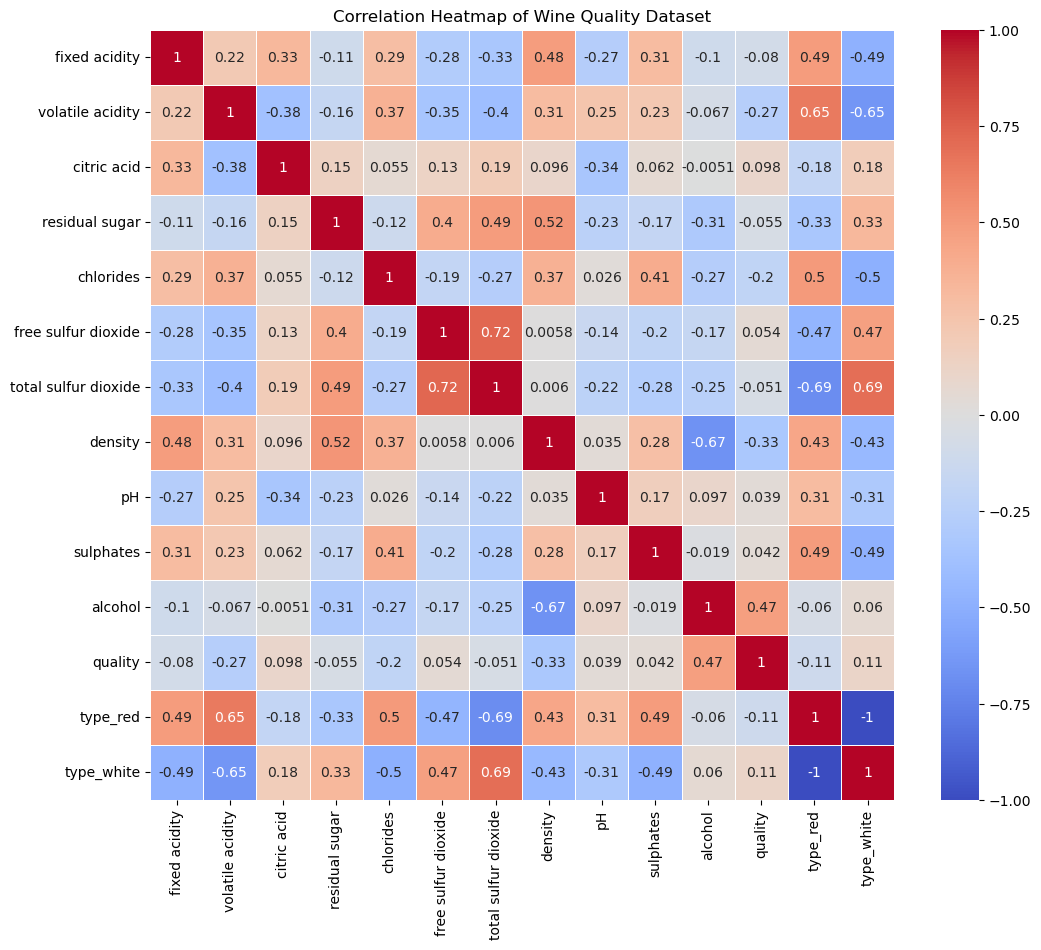

In [22]:
# Calculate the correlation matrix
correlation_matrix = wine_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmax=1, vmin=-1)
plt.title("Correlation Heatmap of Wine Quality Dataset")
plt.show()


**Practical Recommendation:** Start with All Features and Use Regularization or Feature Importance

## Prepare the Data
Separate features and target: The quality column is the target, and all other columns are features.
- Train-test split: Split the data into training and testing sets.
- Feature Scaling: Scale the features, as KNN and Logistic Regression are sensitive to feature magnitudes.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Train and Evaluate Models


In [24]:
import warnings

warnings.filterwarnings('ignore')


We first, define a function to evaluate each model for consistency:

In [25]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"{model_name} Model Performance")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n" + "="*60 + "\n")


**Logistic Regression**

In [26]:
log_reg = LogisticRegression(max_iter=1000, random_state=21)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)


Logistic Regression Model Performance
Accuracy: 0.5108593012275732
Confusion Matrix:
 [[  0   1   6   3   0   0   0]
 [  0   2  27  23   0   0   0]
 [  1   2 215 141   3   0   0]
 [  0   0 115 282  33   0   0]
 [  0   0   9 115  42   0   0]
 [  0   0   0  28  10   0   0]
 [  0   0   0   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.40      0.04      0.07        52
           5       0.58      0.59      0.59       362
           6       0.48      0.66      0.55       430
           7       0.47      0.25      0.33       166
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.51      1059
   macro avg       0.28      0.22      0.22      1059
weighted avg       0.48      0.51      0.48      1059





**K-Nearest Neighbors**

In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn)


K-Nearest Neighbors Model Performance
Accuracy: 0.502360717658168
Confusion Matrix:
 [[  0   1   6   3   0   0   0]
 [  0   6  26  19   1   0   0]
 [  1  11 217 123  10   0   0]
 [  1   5 121 250  53   0   0]
 [  0   0  20  84  59   3   0]
 [  0   0   1  19  18   0   0]
 [  0   0   0   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.26      0.12      0.16        52
           5       0.55      0.60      0.58       362
           6       0.50      0.58      0.54       430
           7       0.42      0.36      0.38       166
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00         1

    accuracy                           0.50      1059
   macro avg       0.25      0.24      0.24      1059
weighted avg       0.47      0.50      0.48      1059





**Random Forest**

In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model("Random Forest", y_test, y_pred_rf)


Random Forest Model Performance
Accuracy: 0.554296506137866
Confusion Matrix:
 [[  0   0   7   3   0   0   0]
 [  0   4  28  20   0   0   0]
 [  0   1 225 130   6   0   0]
 [  0   1  89 304  36   0   0]
 [  0   0   3 108  53   2   0]
 [  0   0   0  23  14   1   0]
 [  0   0   0   0   1   0   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.67      0.08      0.14        52
           5       0.64      0.62      0.63       362
           6       0.52      0.71      0.60       430
           7       0.48      0.32      0.38       166
           8       0.33      0.03      0.05        38
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1059
   macro avg       0.38      0.25      0.26      1059
weighted avg       0.55      0.55      0.53      1059





## Grid search

Grid Search is a hyperparameter tuning method that systematically tests all possible combinations of specified parameter values to find the best combination for a model. It trains and evaluates the model on each combination to identify which set of parameters provides the highest performance based on a chosen metric.

https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html

In [29]:
from sklearn.model_selection import GridSearchCV

### Define the Hyperparameter Grids

**Setting Up Hyperparameter Grids:**

To perform a Grid Search, we need to define the hyperparameter grid for each model. A hyperparameter grid is a dictionary or list of dictionaries where:

- Each key is a hyperparameter of the model.
- Each value is a list of values to try during the search.

1. Logistic Regression Parameter Grid

- The param_grid_log_reg grid defines different combinations for penalty, C (regularization strength), solver (optimization algorithm), and max_iter (maximum number of iterations).

- Note how different penalty options require specific solvers.
- For example, liblinear is compatible with both 'l1' and 'l2', while saga is required for 'elasticnet'.
- The l1_ratio is also included only when penalty is set to 'elasticnet'.

2. K-Nearest Neighbors (KNN) Parameter Grid

- The param_grid_knn grid explores different values for n_neighbors (the number of nearest neighbors), weights (weight function), and p (distance metric).
- Here, p=1 uses the Manhattan distance, and p=2 uses the Euclidean distance.

3. Random Forest Parameter Grid

- The param_grid_rf grid specifies different values for n_estimators (number of trees), max_depth (maximum depth of each tree), min_samples_split (minimum samples to split a node), min_samples_leaf (minimum samples per leaf node), and class_weight (handles class imbalance).
- Including None in max_depth allows trees to grow until they’re fully expanded.

In [30]:
# Logistic Regression parameter grid
param_grid_log_reg = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],  # Compatible with 'l1' and 'l2' penalties
        'max_iter': [1000, 2000]
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag'],  # Compatible only with 'l2'
        'max_iter': [500, 1000]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],  # 'saga' is required for 'elasticnet'
        'l1_ratio': [0.1, 0.5, 0.9],  # Only include l1_ratio for elasticnet
        'max_iter': [500, 1000]
    }
]


# K-Nearest Neighbors parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

# Random Forest parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}


**Set up GridSearchCV for Each Model**

Run the grid search for each model with cross-validation.

In [40]:
#Logistic Regression

log_reg = LogisticRegression(random_state=42, max_iter=1000)

grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train_scaled, y_train)

print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best Cross-Validation Accuracy for Logistic Regression:", grid_search_log_reg.best_score_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomrania

Best Parameters for Logistic Regression: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag'}
Best Cross-Validation Accuracy for Logistic Regression: 0.5550015593326056


In [41]:
#K-Nearest Neighbors
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train_scaled, y_train)

print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy for KNN:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Accuracy for KNN: 0.5493336637633379


In [42]:
#Random Forest
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Cross-Validation Accuracy for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END .C=100, max_iter=5000, penalty=l1, solver=liblinear; total time=   8.4s
[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .......C=0.01, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ......C=0.01, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END ......C=0.1, max_iter=500, penalty=l

### Evaluate the Best Models on the Test Set

In [43]:
# Best models
best_log_reg = grid_search_log_reg.best_estimator_
best_knn = grid_search_knn.best_estimator_
best_rf = grid_search_rf.best_estimator_

# Predictions
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))

# Optional: Detailed reports
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.7s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.7s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.7s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.7s
[CV] END C=1, l1_ratio=0.1, 

### Confusion Matrices for Each Model

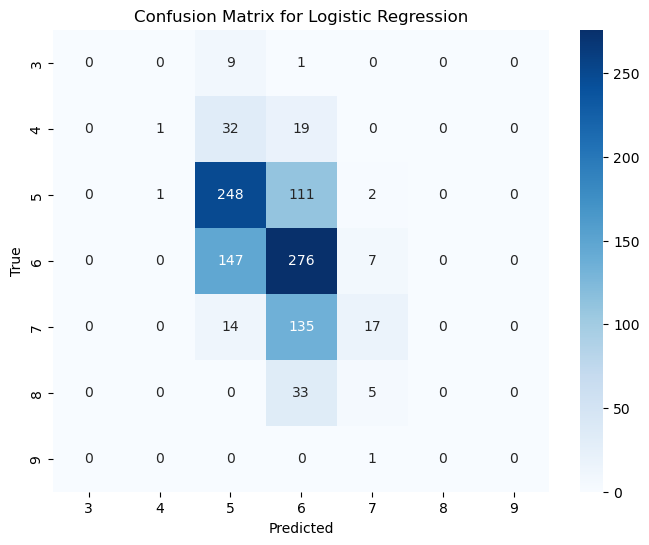

 min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.4s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=77.5min
[CV] END class_weight=balanced, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END class_weight=balanced, max_depth=10, min_samples_lea

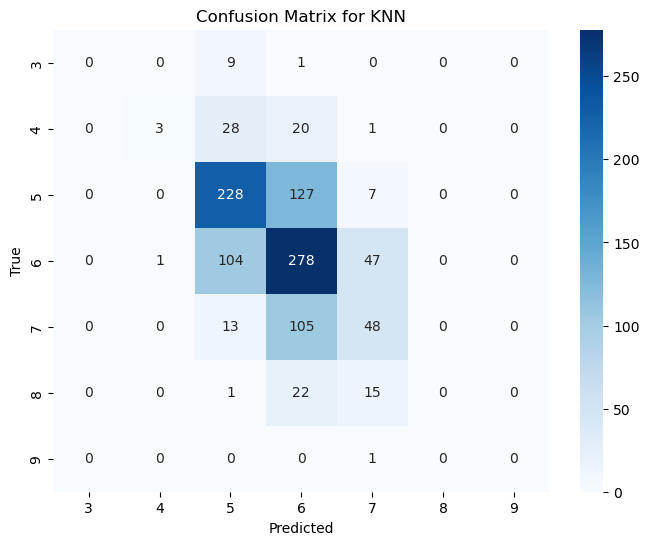

[CV] END C=0.01, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.1, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=0.1, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=10000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=1, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ...C=1, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .C=100, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=100, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END .C=100, max_iter=2000, penalty=l1, solver=liblinear; total time=   2.5s
[CV] END .C=100, max_iter=2000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=100, max_it

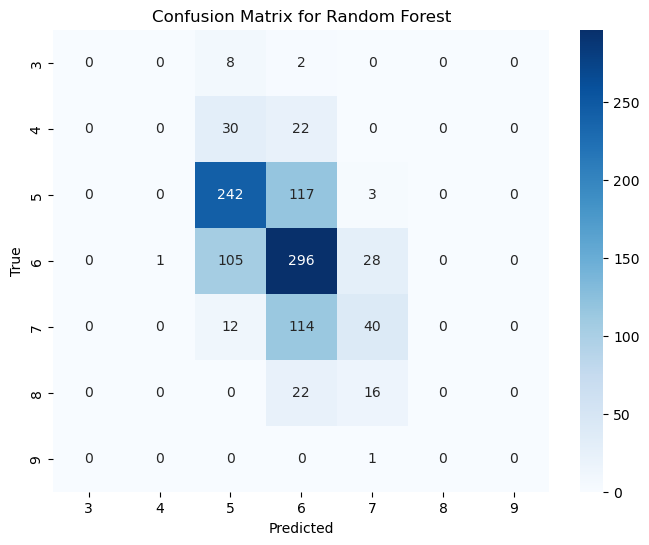

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

plot_confusion_matrix("Logistic Regression", y_test, y_pred_log_reg)
plot_confusion_matrix("KNN", y_test, y_pred_knn)
plot_confusion_matrix("Random Forest", y_test, y_pred_rf)


## SMOTE technique
To apply SMOTE (Synthetic Minority Over-sampling Technique) to your dataset, you can use the SMOTE class from the imblearn library, which is part of the imbalanced-learn package. This technique will help by oversampling the minority classes in the training set, creating synthetic samples to balance the class distribution.

In [45]:
# pip install -U scikit-learn
# pip install -U imbalanced-learn


In [46]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=21, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled training data and the original test data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [47]:
# Logistic Regression parameter grid
param_grid_log_reg = [
    # Grid for 'l1' and 'l2' penalties (no l1_ratio)
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],  # 'liblinear' works with 'l1' and 'l2'
        'max_iter': [2000, 5000, 10000]
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'newton-cg', 'sag'],  # 'l2' with solvers compatible with it
        'max_iter': [500, 1000]
    },
    # Grid for 'elasticnet' penalty (l1_ratio included)
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],  # 'saga' required for 'elasticnet'
        'l1_ratio': [0.1, 0.5, 0.9],  # Only relevant for 'elasticnet'
        'max_iter': [500, 1000]
    }
]


In [48]:


# Define a function for grid search and model evaluation
def evaluate_model(name, model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    print(f"\n{name} - Best Parameters: {grid_search.best_params_}")
    print(f"Mean Cross-Validation Accuracy: {grid_search.best_score_}")
    print(f"{name} Model Performance on Test Set:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    
    return best_model

# Logistic Regression
log_reg = LogisticRegression(random_state=12)
best_log_reg = evaluate_model("Logistic Regression", log_reg, param_grid_log_reg, X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
best_knn = evaluate_model("KNN", knn, param_grid_knn, X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test)

# Random Forest
rf = RandomForestClassifier(random_state=12)
best_rf = evaluate_model("Random Forest", rf, param_grid_rf, X_train_resampled_scaled, y_train_resampled, X_test_scaled, y_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END ..C=10, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=10, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=10, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, sol

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


d, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_de

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

pth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.3s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s
[CV] END class_weight=balanced, max_depth=30, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END class_weight=balanced, max_depth=30, m

/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomranian/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sammieomrania


Logistic Regression - Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean Cross-Validation Accuracy: 0.5662653010199094
Logistic Regression Model Performance on Test Set:
Accuracy: 0.3408876298394712
Confusion Matrix:
 [[  2   4   3   1   0   0   0]
 [  3  20  13  11   3   2   0]
 [ 39  73 172  45  21  11   1]
 [ 37  27 113 102  82  63   6]
 [ 10   6   9  35  50  52   4]
 [  2   1   0   5  12  14   4]
 [  0   0   0   0   0   0   1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.02      0.20      0.04        10
           4       0.15      0.38      0.22        52
           5       0.55      0.48      0.51       362
           6       0.51      0.24      0.32       430
           7       0.30      0.30      0.30       166
           8       0.10      0.37      0.16        38
           9       0.06      1.00      0.12         1

    accuracy                           0.34      1059
   macro avg    